In [9]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
data = pd.read_csv("/Users/anshshah/Desktop/marketing_AB.csv")

In [11]:
data.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [12]:
data.duplicated(subset='user id').sum()
#Checking duplicates

0

In [13]:
data.drop(['Unnamed: 0','user id'], axis = 1, inplace=True)
#Drop unwanted columns in index and id(not sufficient to predict anything by itself)

In [15]:
data.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [40]:
data_cat = data[['test group','converted','most ads day','most ads hour']]
data_cat.nunique()
#Check if the data has appropriate no. of levels

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [41]:
for i in data_cat.columns:
    print(i.upper(),":",data_cat[i].unique())
#Check if the levels are appropriate

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


# Univariate Analysis

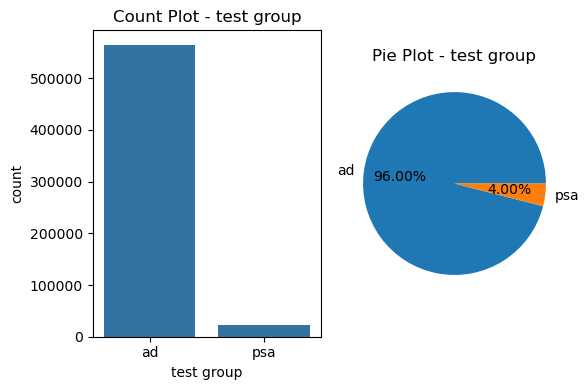

In [42]:
variable = 'test group'

plt.figure(figsize=(6,4))
#Count Plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data = data_cat)
plt.title(f'Count Plot - {variable}')

#Pie Chart
plt.subplot(1,2,2)
counts = data_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%")
plt.title(f'Pie Plot - {variable}')

plt.tight_layout()
plt.show()

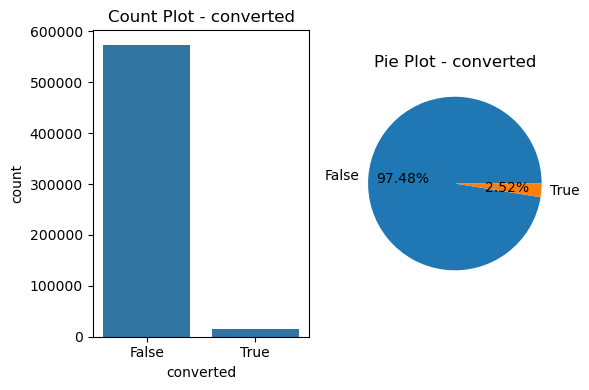

In [43]:
variable = 'converted'

plt.figure(figsize=(6,4))
#Count Plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data = data_cat)
plt.title(f'Count Plot - {variable}')

#Pie Chart
plt.subplot(1,2,2)
counts = data_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%")
plt.title(f'Pie Plot - {variable}')

plt.tight_layout()
plt.show()

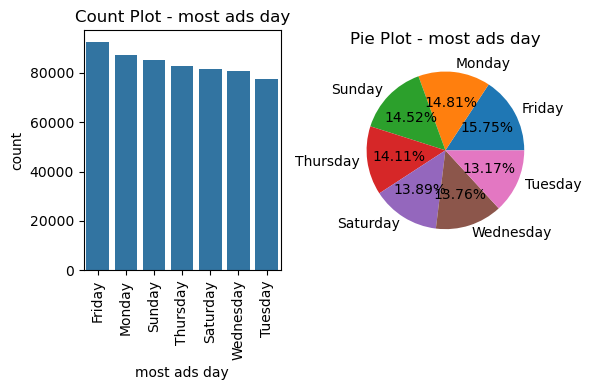

In [44]:
variable = 'most ads day'

plt.figure(figsize=(6,4))
#Count Plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data = data_cat, order = data_cat['most ads day'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

#Pie Chart
plt.subplot(1,2,2)
counts = data_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%")
plt.title(f'Pie Plot - {variable}')

plt.tight_layout()
plt.show()

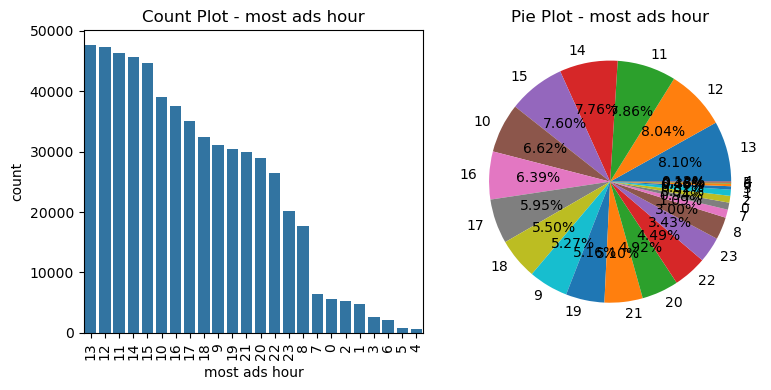

In [45]:
variable = 'most ads hour'

plt.figure(figsize=(8,4))
#Count Plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data = data_cat, order = data_cat['most ads hour'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

#Pie Chart
plt.subplot(1,2,2)
counts = data_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct="%0.2f%%")
plt.title(f'Pie Plot - {variable}')

plt.tight_layout()
plt.show()

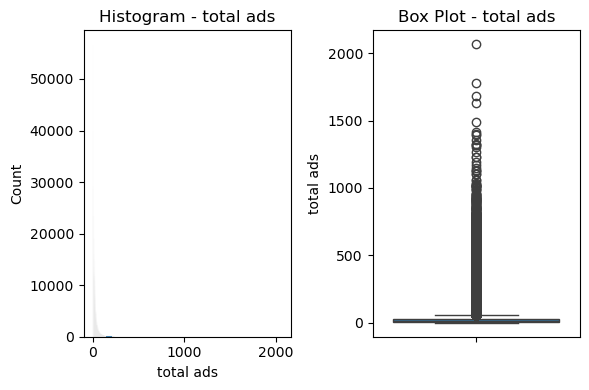

In [47]:
variable = 'total ads'

plt.figure(figsize=(6,4))
#Histogram
plt.subplot(1,2,1)
sns.histplot(x=variable, data = data)
plt.title(f'Histogram - {variable}')

#Box Plot
plt.subplot(1,2,2)
sns.boxplot(y=variable, data = data)
plt.title(f'Box Plot - {variable}')

plt.tight_layout()
plt.show()

In [50]:
data['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

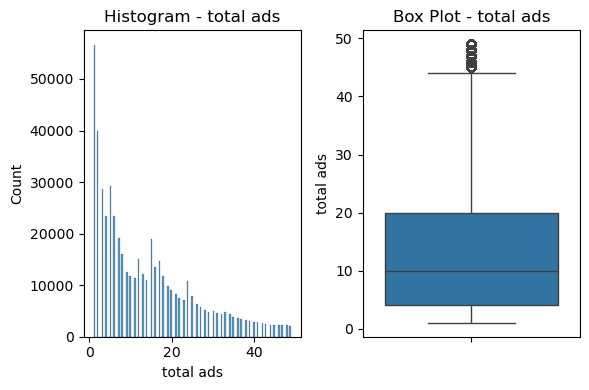

In [51]:
variable = 'total ads'

plt.figure(figsize=(6,4))
#Histogram
plt.subplot(1,2,1)
sns.histplot(x=variable, data = data[data['total ads']<50])
plt.title(f'Histogram - {variable}')

#Box Plot
plt.subplot(1,2,2)
sns.boxplot(y=variable, data = data[data['total ads']<50])
plt.title(f'Box Plot - {variable}')

plt.tight_layout()
plt.show()

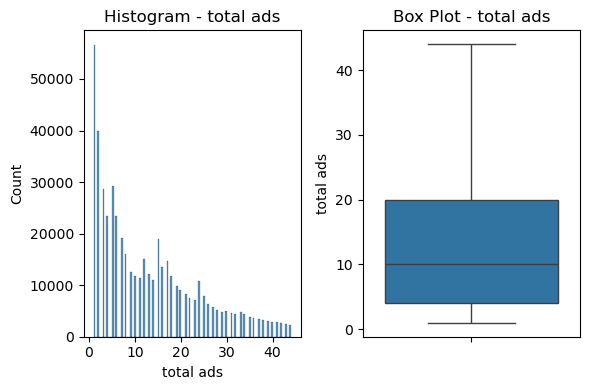

In [52]:
variable = 'total ads'

plt.figure(figsize=(6,4))
#Histogram
plt.subplot(1,2,1)
sns.histplot(x=variable, data = data[data['total ads']<45])
plt.title(f'Histogram - {variable}')

#Box Plot
plt.subplot(1,2,2)
sns.boxplot(y=variable, data = data[data['total ads']<45])
plt.title(f'Box Plot - {variable}')

plt.tight_layout()
plt.show()

# Bivariate Analysis

In [54]:
data.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [56]:
ct_conversion_test_group = pd.crosstab(data['test group'],data['converted'], normalize = 'index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Axes: xlabel='test group'>

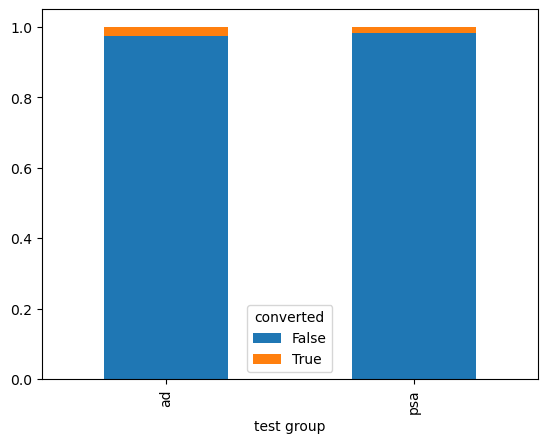

In [57]:
ct_conversion_test_group.plot.bar(stacked = True)

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


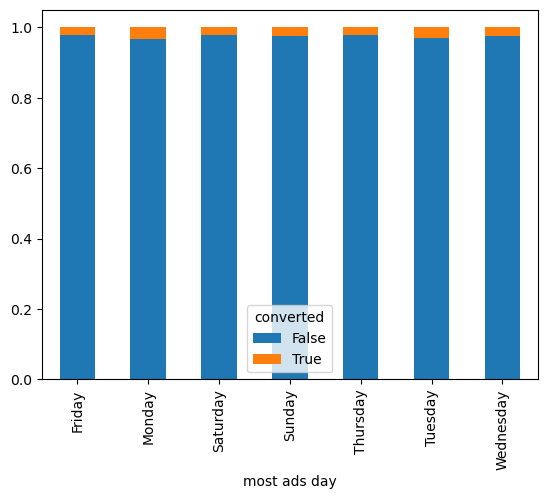

In [58]:
ct_conversion_test_group = pd.crosstab(data['most ads day'],data['converted'], normalize = 'index')
print(ct_conversion_test_group.sort_values(by=True, ascending=False))
ct_conversion_test_group.plot.bar(stacked = True);

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


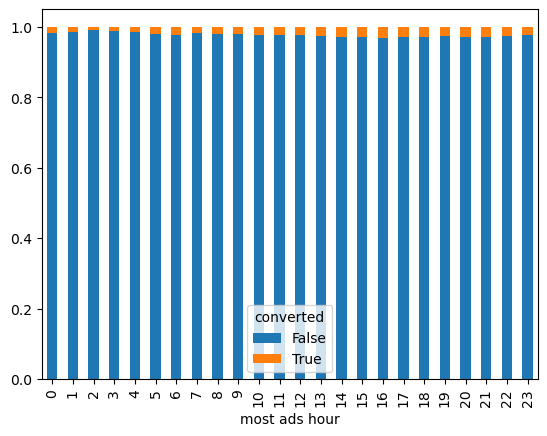

In [59]:
ct_conversion_test_group = pd.crosstab(data['most ads hour'],data['converted'], normalize = 'index')
print(ct_conversion_test_group.sort_values(by=True, ascending=False))
ct_conversion_test_group.plot.bar(stacked = True);

<Axes: xlabel='converted', ylabel='total ads'>

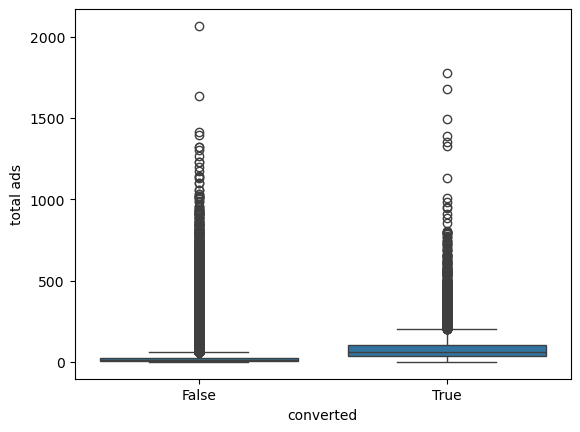

In [60]:
sns.boxplot(x = 'converted', y = 'total ads', data = data)

<Axes: xlabel='converted', ylabel='total ads'>

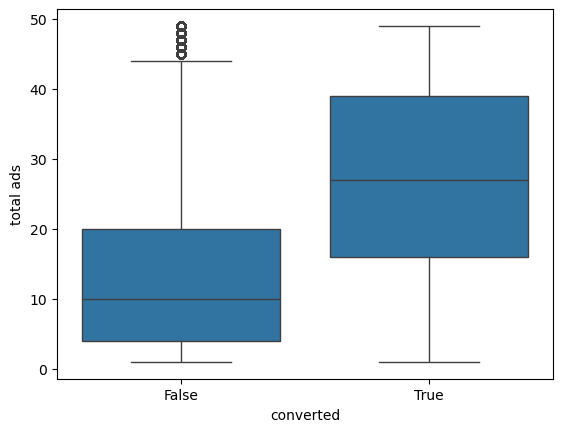

In [61]:
sns.boxplot(x = 'converted', y = 'total ads', data = data[data['total ads']<50])

# Statistical Tests

In [62]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in data_cat.columns:
    if variable != 'converted':
        #Contingency table (cross-tabulation)
        contingency_table = pd.crosstab(data_cat[variable], data_cat['converted'])
        
        #Chi-squared
        chi2,p,_,_ = chi2_contingency(contingency_table)
        
        #Display
        print(f"\nChi-squared test for {variable} vs. Converted")
        print(f"\nChi-squared Value : {chi2}")
        print(f"\np Value: {p}")
        
        if p<alpha:
            print(f"\nThere is a statistically significant difference in conversion rates across {variable}")
            
        else:
            print(f"\nThere is no statistically significant difference in conversion rates across {variable}")



Chi-squared test for test group vs. Converted

Chi-squared Value : 54.005823883685245

p Value: 1.9989623063390078e-13

There is a statistically significant difference in conversion rates across test group

Chi-squared test for most ads day vs. Converted

Chi-squared Value : 410.0478857936585

p Value: 1.932184379244731e-85

There is a statistically significant difference in conversion rates across most ads day

Chi-squared test for most ads hour vs. Converted

Chi-squared Value : 430.76869230822086

p Value: 8.027629823696774e-77

There is a statistically significant difference in conversion rates across most ads hour


In [64]:
data_cat.head()

,test group,converted,most ads day,most ads hour
0,ad,False,Monday,20
1,ad,False,Tuesday,22
2,ad,False,Tuesday,18
3,ad,False,Tuesday,10
4,ad,False,Friday,14


In [69]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
# Step 1: Check Assumptions
# Normaility Assumptions

shapiro_stat_true, shapiro_p_value_true = shapiro(data[data['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(data[data['converted'] == False]['total ads'])

print(f"Shapiro-Wilk test for normality(True Group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality(False Group): p-value = {shapiro_p_value_false}")
      
#Equality of variances (Levene) test
levene_stat, levene_p_value = levene(data[data['converted']]['total ads'], data[~data['converted']]['total ads'])
print(f"Levene's test: p-value = {levene_p_value}")

Shapiro-Wilk test for normality(True Group): p-value = 1.638680987007771e-98
Shapiro-Wilk test for normality(False Group): p-value = 9.883049430735801e-204
Levene's test: p-value = 0.0


/opt/homebrew/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14843.
  res = hypotest_fun_out(*samples, **kwds)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 573258.
  res = hypotest_fun_out(*samples, **kwds)


In [70]:
#Step 2: Perform a suitable test
alpha = 0.05

if shapiro_p_value_true>alpha and shapiro_p_value_false>alpha and levene_p_value>alpha:
    #Use t-test as assumptions are met
    t_stat, t_p_value = ttest_ind(data[data['converted']]['total ads'], data[~data['converted']]['total ads'])
    print(f"Independent two-sample t-test: p-value: {t_p_value}")
    
else:
    #Mann-Whitney U test for medians as assumptions are not met
    u_stat, u_p_value = mannwhitneyu(data[data['converted']]['total ads'], data[~data['converted']]['total ads'])
    print(f"Mann-Whitney U test: p-value: {u_p_value}")

Mann-Whitney U test: p-value: 0.0
